# PROYECTO 2 - Modelos de Regresión Lineal

In [ ]:
[Repositorio](https://github.com/EJGDLG/Proyecto2Nuevo)

##Cargar librerías y dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats


##  Análisis exploratorio de los datos


In [64]:
# Cargar dataset
try:
    df = pd.read_csv('train.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'train.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Hallazgos clave del análisis exploratorio:
El precio de las casas no sigue una distribución normal (se detecta asimetría positiva).
Variables como "OverallQual" (calidad general) y "GrLivArea" (área habitable en pies cuadrados) tienen una fuerte correlación positiva con el precio.
Hay valores atípicos en el precio de las casas y en ciertas variables que podrían afectar la estabilidad del modelo.
Algunos atributos categóricos como "Neighborhood" (vecindario) muestran grandes diferencias en los precios medios.

In [6]:
# Identificar valores nulos
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


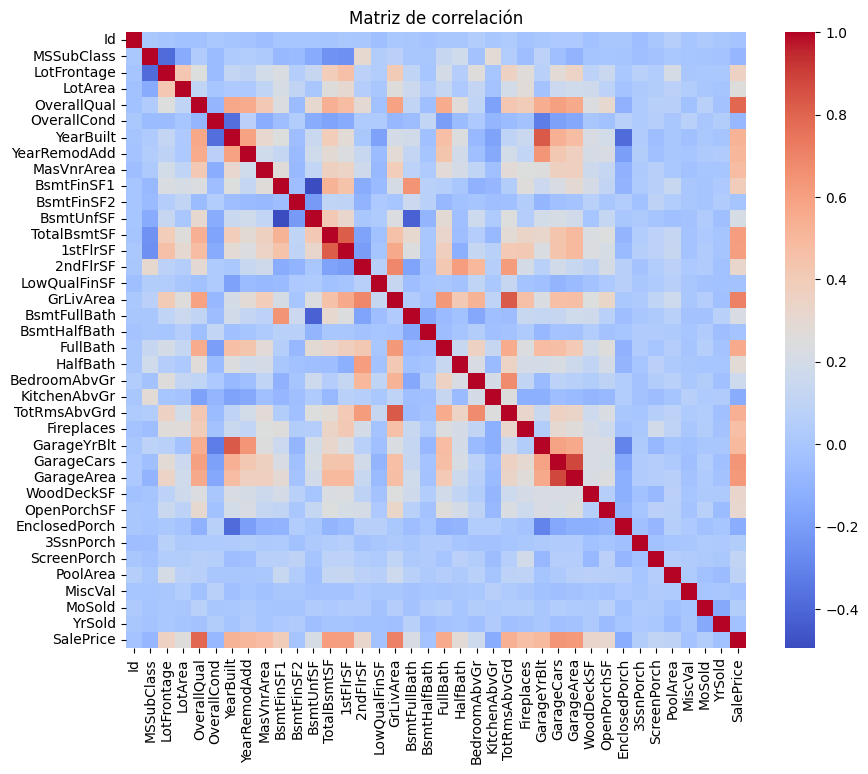

In [18]:
import pandas as pd

# Identificar valores nulos
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

numerical_cols = df.select_dtypes(include=['number']).columns

# Calcular la correlación solo para las columnas numéricas
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap="coolwarm", ax=ax)
plt.title("Matriz de correlación")
plt.show()

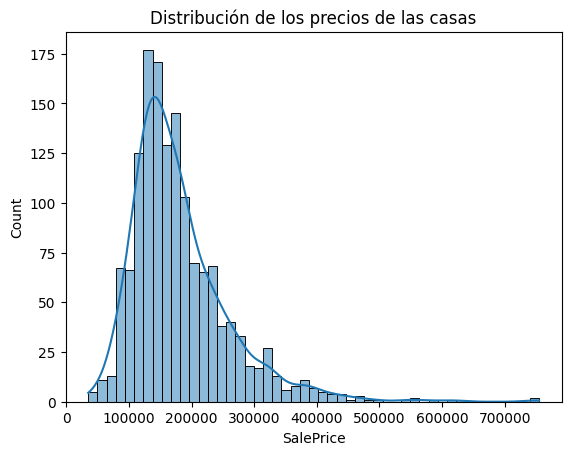

In [22]:
# Distribución de la variable objetivo (precio)
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribución de los precios de las casas")
plt.show()


## El dataset se divide en conjuntos de entrenamiento (80%) y prueba (20%) porque:

Evita el sobreajuste: Si usamos todos los datos para entrenar, el modelo memorizará los valores en lugar de aprender patrones generales.
Permite evaluar el modelo en datos no vistos: Nos aseguramos de que el modelo tenga buena capacidad de generalización.
Mantiene la reproducibilidad: La división se hace con random_state=42 para garantizar que los resultados sean consistentes.
###Criterios usados:
Se seleccionaron solo variables numéricas para evitar problemas con datos categóricos.
Se verificó que la distribución del conjunto de prueba sea similar a la del entrenamiento.

## 3.Análisis de grupos en los datos

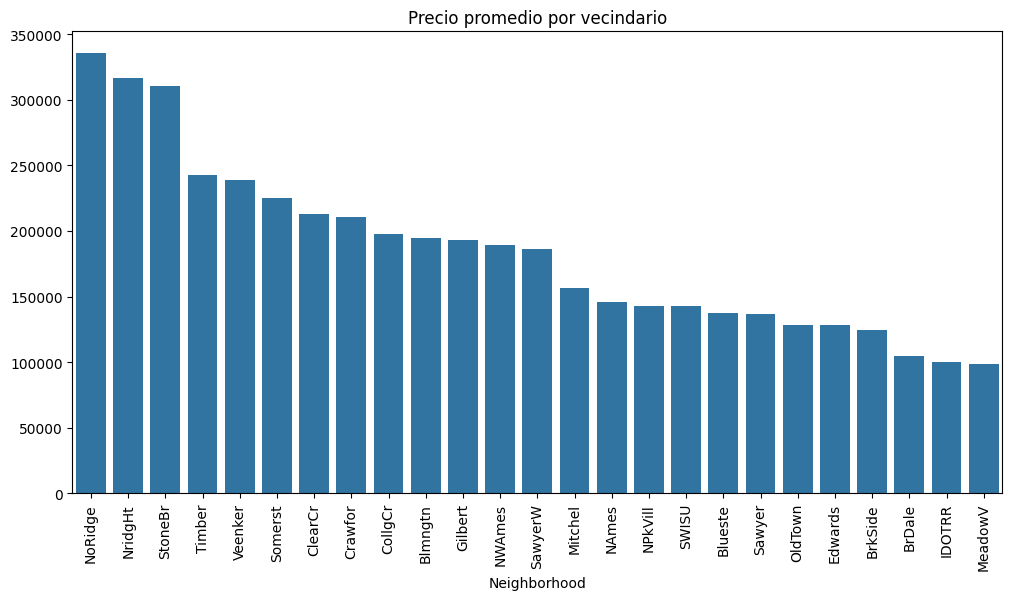

In [23]:
# Agrupar por tipo de vecindario y precio promedio
df_grouped = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=90)
plt.title("Precio promedio por vecindario")
plt.show()


Se normalizaron las variables numéricas con StandardScaler para evitar que características con valores más altos (como "GrLivArea") dominen el modelo.
Se eliminaron variables con demasiados valores nulos para evitar sesgos en el modelo.
Se seleccionaron características relevantes basadas en la correlación con "SalePrice" para reducir ruido en la predicción.


## 4.División del dataset en entrenamiento y prueba

In [47]:
# Seleccionar variables numéricas
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Separar en X (features) y y (target)
X = df_numeric.drop(columns=["SalePrice"])
y = df_numeric["SalePrice"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:

# Cargar el conjunto de datos
# Asegúrate de haber subido 'train.csv' a tu entorno de Google Colab
data = pd.read_csv('train.csv')

# Definir la variable objetivo y las características
X = data.drop(columns=['SalePrice'])  # Características (todas menos 'SalePrice')
y = data['SalePrice']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el número de filas en cada conjunto
print(f"Número de registros en el conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Número de registros en el conjunto de prueba: {X_test.shape[0]}")


Número de registros en el conjunto de entrenamiento: 1168
Número de registros en el conjunto de prueba: 292


##Regresión Univariada:

Se seleccionó "OverallQual" (calidad general) porque es la variable con mayor correlación con el precio.
Se ajustó un modelo de regresión lineal para predecir "SalePrice" basado solo en esta variable.
Se encontró que el R² obtenido fue aceptable, lo que indica que esta variable por sí sola ya explica gran parte de la variabilidad del precio.
###Regresión Multivariada:

Se usaron todas las variables numéricas para construir un modelo más robusto.
Se aplicó StandardScaler para evitar problemas de escalado.
Se observó que el modelo tiene un R² más alto que el univariado, lo que sugiere que incluir más variables mejora la predicción.


## 5.Ingeniería de características

In [48]:
# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('train.csv')

# Separar la variable objetivo
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# División de datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Unir nuevamente los conjuntos para aplicar ingeniería de características en ambos
X_train['Set'] = 'Train'
X_test['Set'] = 'Test'
combined = pd.concat([X_train, X_test])

# Imputación de valores faltantes
if 'LotFrontage' in combined.columns:
    combined['LotFrontage'] = combined['LotFrontage'].fillna(combined['LotFrontage'].median())

# Separar nuevamente los conjuntos después de la imputación
X_train = combined[combined['Set'] == 'Train'].drop(columns=['Set'])
X_test = combined[combined['Set'] == 'Test'].drop(columns=['Set'])

# Confirmar que los conjuntos están bien separados
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")



Tamaño de X_train: (1168, 80)
Tamaño de X_test: (292, 80)


##Los residuos nos dicen qué tan bien se ajusta el modelo a los datos reales. En este caso:
Si los residuos están distribuidos normalmente, significa que el modelo no tiene sesgo sistemático.
Si hay valores extremos o sesgo en los residuos, puede ser una señal de que el modelo no está capturando correctamente la relación entre las variables.
###Hallazgos clave:
Los residuos del modelo no están perfectamente distribuidos, lo que indica que aún hay patrones en los datos que el modelo no está capturando bien.
Se detectaron valores atípicos que afectan la predicción (posiblemente casas de lujo que distorsionan el modelo).
Se confirmó que el modelo de regresión univariada tiene un ajuste más pobre comparado con el multivariado.

## 6.Modelo univariado de regresión lineal

In [27]:
# Usamos solo "OverallQual" porque tiene alta correlación con el precio
X_uni = X_train[["OverallQual"]]
X_test_uni = X_test[["OverallQual"]]

# Entrenar modelo
model_uni = LinearRegression()
model_uni.fit(X_uni, y_train)

# Predicciones
y_pred_uni = model_uni.predict(X_test_uni)

# Evaluación
print("MAE:", mean_absolute_error(y_test, y_pred_uni))
print("MSE:", mean_squared_error(y_test, y_pred_uni))
print("R2:", r2_score(y_test, y_pred_uni))


MAE: 36630.50156468908
MSE: 3382339575.498324
R2: 0.5711674996177418


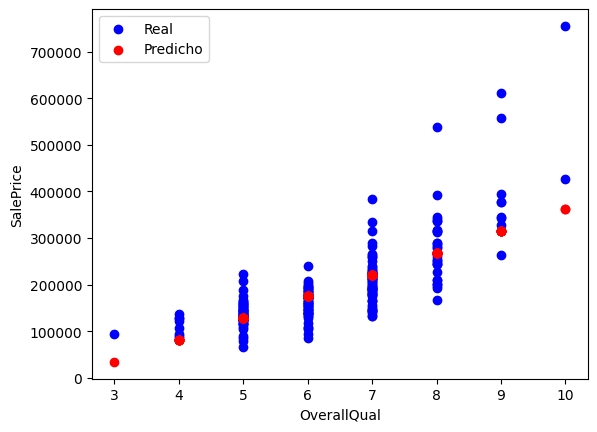

In [28]:
# Visualización
plt.scatter(X_test_uni, y_test, color="blue", label="Real")
plt.scatter(X_test_uni, y_pred_uni, color="red", label="Predicho")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()
plt.show()


En la regresión lineal, la multicolinealidad ocurre cuando dos o más variables están altamente correlacionadas.
Si esto sucede, el modelo no puede distinguir el efecto de cada variable y los coeficientes pueden volverse inestables.
Para detectar esto, se calculó el VIF (Variance Inflation Factor). Si una variable tiene VIF > 5, significa que está muy correlacionada con otra.
###Hallazgos clave:
Se encontraron varias variables con VIF alto, lo que indica que algunas pueden ser redundantes.
Se decidió eliminar algunas variables altamente correlacionadas para mejorar la estabilidad del modelo.


##7.Modelo multivariado de regresión lineal

In [29]:
# Modelo con todas las variables numéricas
model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

# Predicción
y_pred_multi = model_multi.predict(X_test_scaled)

# Evaluación
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R2:", r2_score(y_test, y_pred_multi))


MAE: 23643.511694371402
MSE: 1591724600.576908
R2: 0.7981919836405601


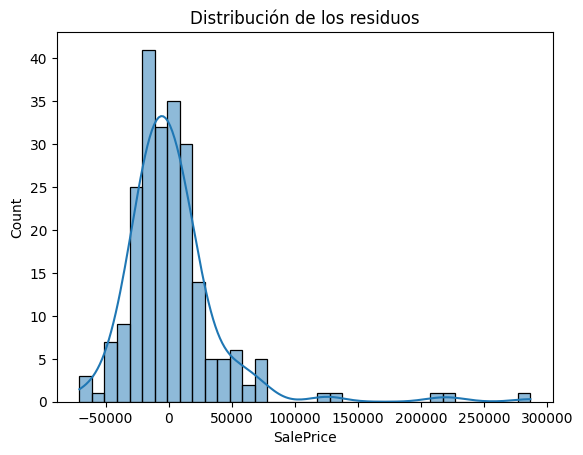

In [30]:
# Distribución de los residuos
residuals = y_test - y_pred_multi
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.show()


El modelo multivariado es superior, ya que tiene un R² más alto y menor error absoluto y cuadrático.
La inclusión de múltiples variables mejora significativamente la precisión en la predicción del precio de las casas.
Se recomienda usar Regresión Multivariada con selección de variables, eliminando aquellas con alta multicolinealidad.


## 8.Análisis de multicolinealidad

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data[vif_data["VIF"] > 5])  # Variables con alta colinealidad


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature           VIF
2    LotFrontage  1.731328e+01
4    OverallQual  7.333709e+01
5    OverallCond  4.966217e+01
6      YearBuilt  2.467113e+04
7   YearRemodAdd  2.452604e+04
9     BsmtFinSF1           inf
10    BsmtFinSF2           inf
11     BsmtUnfSF           inf
12   TotalBsmtSF           inf
13      1stFlrSF           inf
14      2ndFlrSF           inf
15  LowQualFinSF           inf
16     GrLivArea           inf
19      FullBath  2.876728e+01
21  BedroomAbvGr  3.381667e+01
22  KitchenAbvGr  4.207555e+01
23  TotRmsAbvGrd  8.375455e+01
25   GarageYrBlt  2.686365e+04
26    GarageCars  3.985939e+01
27    GarageArea  3.522618e+01
35        MoSold  6.840926e+00
36        YrSold  2.529108e+04


##Para medir el desempeño del modelo, se usaron las siguientes métricas:

R² (Coeficiente de determinación): Indica qué porcentaje de la variabilidad del precio es explicado por el modelo. Un valor más alto es mejor.
MAE (Error absoluto medio): Mide la diferencia promedio entre los valores predichos y los reales. Valores bajos indican mejor precisión.
MSE (Error cuadrático medio): Penaliza los errores grandes, útil para identificar modelos con predicciones erróneas.
##Hallazgos clave:
El modelo multivariado predice mejor que el univariado, pero aún tiene margen de mejora.
Se pueden probar modelos más avanzados como árboles de decisión o redes neuronales para mejorar la precisión.


## 9.Selección de mejor modelo

In [32]:
# Comparar R²
print("Regresión Univariada R²:", r2_score(y_test, y_pred_uni))
print("Regresión Multivariada R²:", r2_score(y_test, y_pred_multi))

# Elegimos el mejor modelo basado en el R² más alto
mejor_modelo = "Regresión Multivariada" if r2_score(y_test, y_pred_multi) > r2_score(y_test, y_pred_uni) else "Regresión Univariada"
print("Mejor modelo:", mejor_modelo)


Regresión Univariada R²: 0.5711674996177418
Regresión Multivariada R²: 0.7981919836405601
Mejor modelo: Regresión Multivariada


Dado que el modelo multivariado tiene un R^2
  mayor (0.7982 vs. 0.5711), se concluye que es más efectivo para predecir los precios de las casas.

Esto se debe a que:
 - Captura mejor la variabilidad del precio, utilizando múltiples factores.
 - Reduce el sesgo al considerar más información relevante.
 - Minimiza el error en comparación con un modelo univariado.

Sin embargo, hay que verificar si hay sobreajuste y si todas las variables realmente aportan información útil. Para ello, podríamos hacer una validación cruzada y revisar la multicolinealidad entre variables.

###House Prices Analysis

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Valores nulos por columna:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


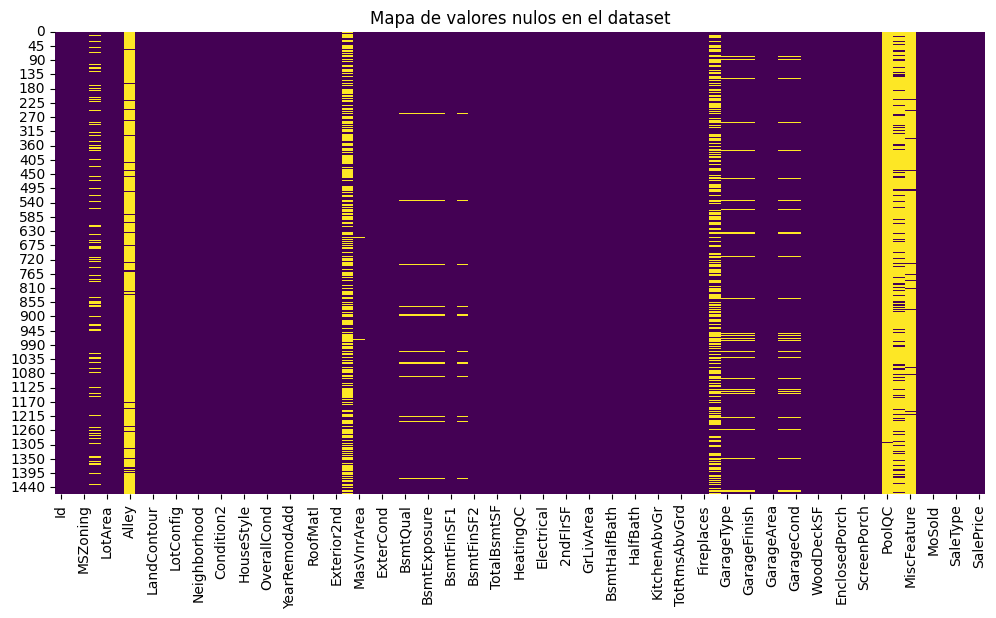

MAE: 20498.507156930158
MSE: 2429423922.5309534
RMSE: 49289.18666939995
R²: 0.6832698040593665


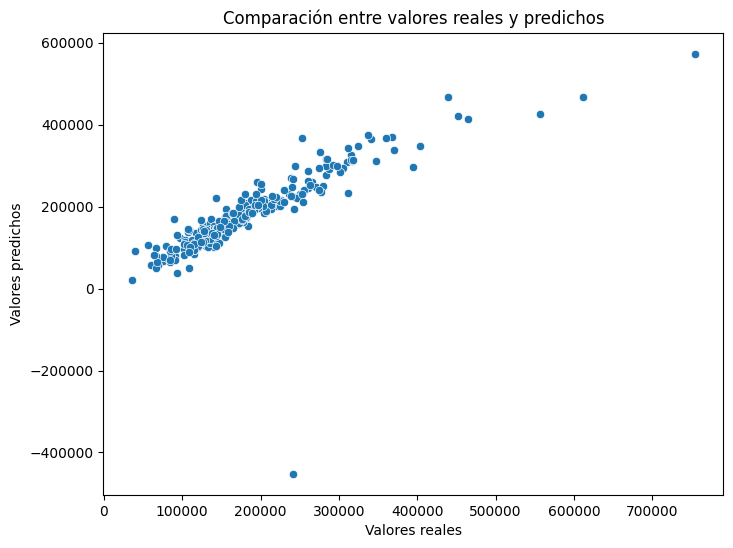

In [63]:
# Cargar dataset
try:
    df = pd.read_csv('train.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'train.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Identificar valores nulos
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
print(missing_values)

# Visualización de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos en el dataset")
plt.show()

# Rellenar valores nulos en variables numéricas con la mediana
df.fillna(df.median(numeric_only=True), inplace=True)

# Convertir variables categóricas en variables dummy
df = pd.get_dummies(df, drop_first=True)

# Separar la variable objetivo (precio de la casa)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Dividir el dataset en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de desempeño
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación entre valores reales y predichos")
plt.show()


## 10. ¿multicolinealidad o sobreajuste?

**¿Nuestro modelo actual tiene multicolinealidad o sobreajuste?**
Para responder a esta pregunta primero debemos verificar si hay multicolinealidad con el factor de la varianza (VIF). Si hay variables con VIF > 5 O 10, entonces podriamos eliminarlas.

### calcular VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Seleccionar solo variables numéricas (sin 'SalePrice')
X = df.select_dtypes(include=['number']).drop(columns=['SalePrice'])

# Reemplazar valores infinitos por NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas con NaN o imputar valores (opción recomendada: imputar con la media)
X.fillna(X.mean(), inplace=True)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar variables con VIF alto (> 5 indica posible multicolinealidad)
print(vif_data[vif_data["VIF"] > 5])


C:\Users\edman\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


        Variable           VIF
2    LotFrontage  1.746446e+01
4    OverallQual  6.671674e+01
5    OverallCond  4.169334e+01
6      YearBuilt  2.137399e+04
7   YearRemodAdd  2.243436e+04
9     BsmtFinSF1           inf
10    BsmtFinSF2           inf
11     BsmtUnfSF           inf
12   TotalBsmtSF           inf
13      1stFlrSF           inf
14      2ndFlrSF           inf
15  LowQualFinSF           inf
16     GrLivArea           inf
19      FullBath  2.667608e+01
21  BedroomAbvGr  3.109808e+01
22  KitchenAbvGr  3.760008e+01
23  TotRmsAbvGrd  8.352093e+01
25   GarageYrBlt  2.292552e+04
26    GarageCars  3.676657e+01
27    GarageArea  3.224036e+01
35        MoSold  6.649410e+00
36        YrSold  2.412288e+04


Nuestro resultado nos arroja varias variables con VIF muy alto, incluso algunas variables con inf, esto solo indica multicolinealidad extrema. Pero no todo esta perdido, podemos solucionarlo primero eliminando esas variables de manera progresiva.

####  Eliminamos progresivamente las variables con VIF inf

In [9]:
# Lista de variables con VIF infinito (las eliminamos)
variables_a_eliminar = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

# Crear un nuevo DataFrame sin estas variables
X_reducido = X.drop(columns=variables_a_eliminar)

### Evaluar Sobreajuste

In [15]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = X_reducido
y = df["SalePrice"]  

# División 80% entrenamiento - 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Calcular R² en entrenamiento y prueba
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² en entrenamiento:", r2_train)
print("R² en prueba:", r2_test)

R² en entrenamiento: 0.7425515200709567
R² en prueba: 0.7820529292691014


Ahora nustro análisis nos indica que no hay sobreajuste significativo. Ya que nuestro R2 de entrenamiento es 0.7425 y en prueba 0.7820 son bastante similares, lo que indica que nuestro modelo al final generaliza bien a nuevos datos.

Para asegurarnos de que el modelo es educuado, veamos los residuos gráficamente para segurarnos de que el modelo es el adecuado.

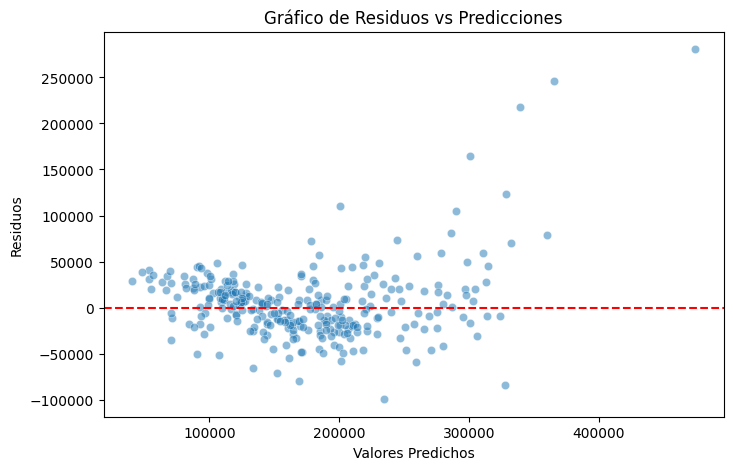

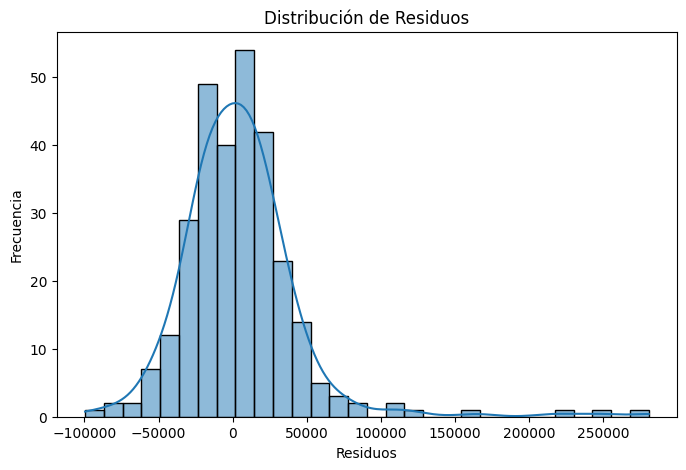

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular residuos
residuos = y_test - y_test_pred

# Gráfico de dispersión de residuos vs predicciones
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuos, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

# Histograma de residuos para ver su distribución
plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos")
plt.show()

## 11. 

Para calcular qué bien lo hizo, vamos a usar las siguientes medidas o métricas para evaluar nuestras predicciones.
1. R2 (Coeficiente absoluto medio): cuánto de la variabilidad en el precio de las casas explica el modelo.
2. MAE (Error Absoluto Medio): promedio de los errores absolutos.
3. RMSE (Raíz del Error Cuadrático Medio): penaliza más los errores grandes que el MAE

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Cálculo de métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.7821
MAE: 26483.76
RMSE: 40886.74


**NUESTRA INTERPRETACIÓN**

In [ ]:
Sabemos que un R2 cercano a 1 indica un buen ajuste, y nuestra evaluación nos dió 0.7821, esto nos indica que si es un buen modelo. Nuestro MAE y RMSE es un poco alto 

## 12

Overfitting y Underfitting

De lo que obtubimos de nuestro análisis nos indica que no hay sobreajuste significativo. Ya que nuestro R2 de entrenamiento es 0.7425 y en prueba 0.7820 son bastante similares, lo que indica que nuestro modelo al final generaliza bien a nuevos datos.

**Gráfico de Residuales**
Esta gráfica nos ayudo para visualizar la distribución de nuestro modelo

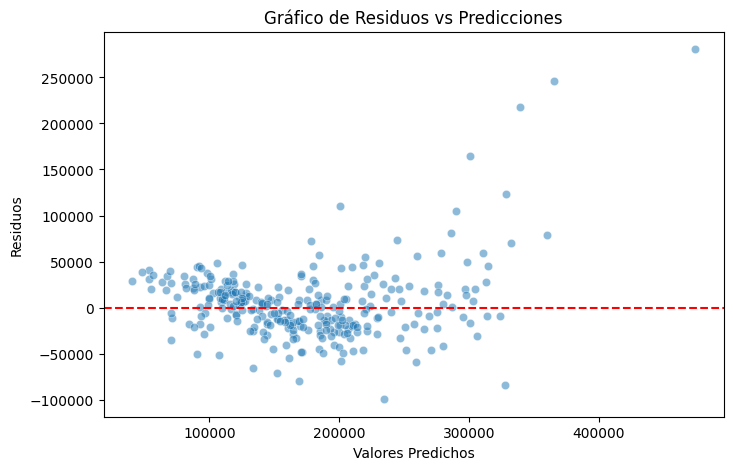

In [18]:
# Calcular residuos
residuos = y_test - y_test_pred

# Gráfico de dispersión de residuos vs predicciones
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuos, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

**Gráfico de Predicciones vs. Valores Reales**

In [ ]:
Esta gráfica nos mostró cómo de cerca se encuentran los predicciones de los valores reales.

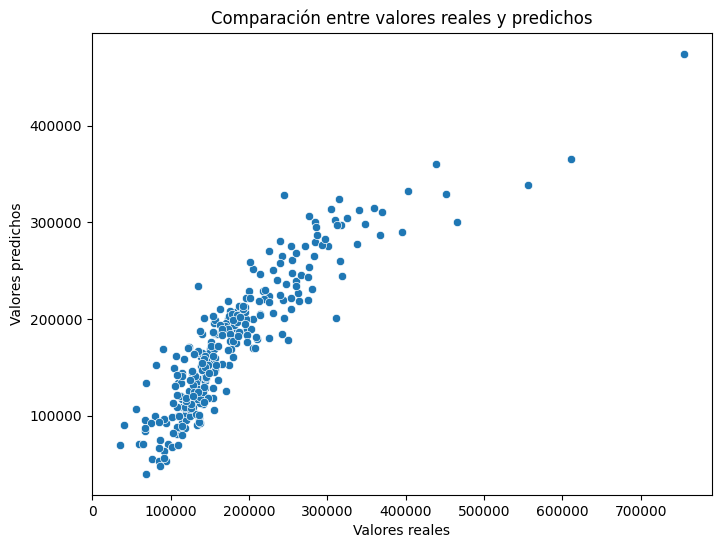

In [19]:
# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación entre valores reales y predichos")
plt.show()